In [1]:
#!/usr/bin/env pyhon
from __future__ import print_function
from itertools import count
import numpy as np
import torch
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [14]:
x = [0,2,4,6,8,10]
print(type(x))
y = [0]*len(x)
print(type(x))
print(y)
s = [20*4**n for n in range(len(x))]
print(type(x))
#print(str(n)+'\t')
#print(s)
#for n in range(len(x)):
  #  print(n)
   # print(4**n)

<class 'list'>
<class 'list'>
[0, 0, 0, 0, 0, 0]
<class 'list'>


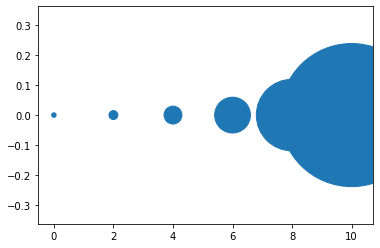

In [15]:
plt.scatter(x,y,s=s)
plt.show()

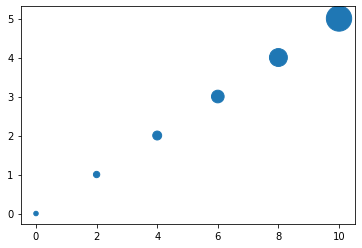

In [20]:
x = [0,2,4,6,8,10]
y = [0+n for n in range(len(x))]
s = [20*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()

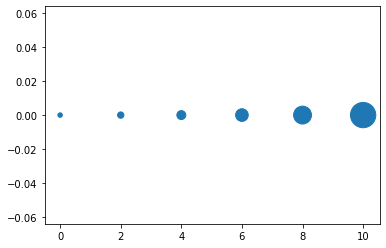

In [21]:
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()

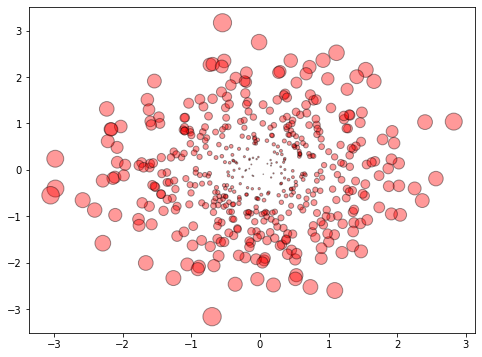

In [61]:
fig=plt.figure(figsize=(8,6))
mu_vec1=np.array([0,0])
cov_mat1=np.array([[1,0],[0,1]])
X=np.random.multivariate_normal(mu_vec1,cov_mat1,500)
R=X**2
R_sum=R.sum(axis=1)
plt.scatter(X[:,0],X[:,1],color='red',marker='o',
            s=32.*R_sum,edgecolor='black',alpha=0.4)


plt.show()

(100, 2)


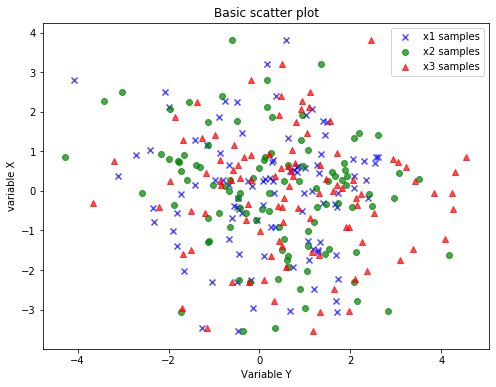

In [57]:
mu_vecl = np.array([0, 0])
cov_matl = np.array([[2,0],[0,2]])

x1_samples = np.random.multivariate_normal(mu_vecl, cov_matl,100)
x2_samples = np.random.multivariate_normal(mu_vecl+0.2, cov_matl +0.2, 100)
x3_samples = np.random.multivariate_normal(mu_vecl+0.4, cov_matl +0.4, 100)
print(x1_samples.shape)
plt.figure(figsize = (8, 6))

plt.scatter(x1_samples[:,0], x1_samples[:, 1], marker='x',
           color = 'blue', alpha=0.7, label = 'x1 samples')
plt.scatter(x2_samples[:,0], x1_samples[:,1], marker='o',
           color ='green', alpha=0.7, label = 'x2 samples')
plt.scatter(x3_samples[:,0], x1_samples[:,1], marker='^',
           color ='red', alpha=0.7, label = 'x3 samples')
plt.title('Basic scatter plot')
plt.ylabel('variable X')
plt.xlabel('Variable Y')
plt.legend(loc = 'upper right')

plt.show()

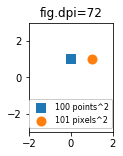

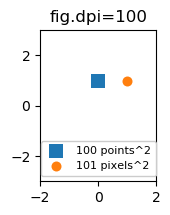

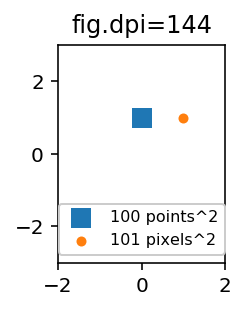

In [67]:

import matplotlib.pyplot as plt

for dpi in [72,100,144]:

    fig,ax = plt.subplots(figsize=(1.5,2), dpi=dpi)
    ax.set_title("fig.dpi={}".format(dpi))

    ax.set_ylim(-3,3)
    ax.set_xlim(-2,2)

    ax.scatter([0],[1], s=10**2, 
               marker="s", linewidth=0, label="100 points^2")
    ax.scatter([1],[1], s=(10*72./fig.dpi)**2, 
               marker="o", linewidth=0, label="101 pixels^2")

    ax.legend(loc=8,framealpha=1, fontsize=8)

    fig.savefig("fig{}.png".format(dpi), bbox_inches="tight")

plt.show() 

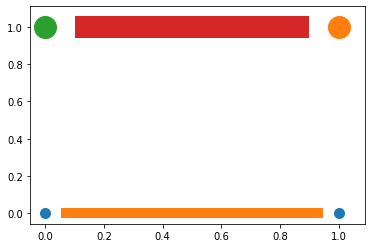

In [59]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot([0],[0], marker="o",  markersize=10)
ax.plot([0.07,0.93],[0,0],    linewidth=10)
ax.scatter([1],[0],           s=100)

ax.plot([0],[1], marker="o",  markersize=22)
ax.plot([0.14,0.86],[1,1],    linewidth=22)
ax.scatter([1],[1],           s=22**2)

plt.show()

20


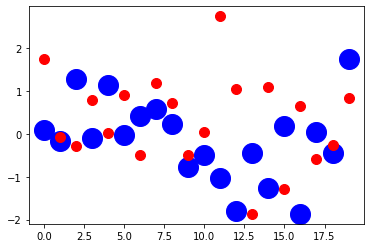

In [76]:
x1 = np.random.randn(20)
#print(x1.size)
x2 = np.random.randn(20)
plt.figure(1)
# you can specify the marker size two ways directly:
plt.plot(x1, 'bo', markersize=20)  # blue circle with size 10 
plt.plot(x2, 'ro', ms=10,)  # ms is just an alias for markersize
plt.show()

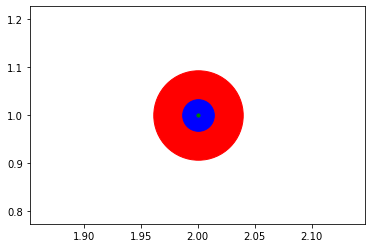

In [78]:
plt.scatter(2, 1, s=8000, c='r')
plt.scatter(2, 1, s=1000 ,c='b')
plt.scatter(2, 1, s=10, c='g')

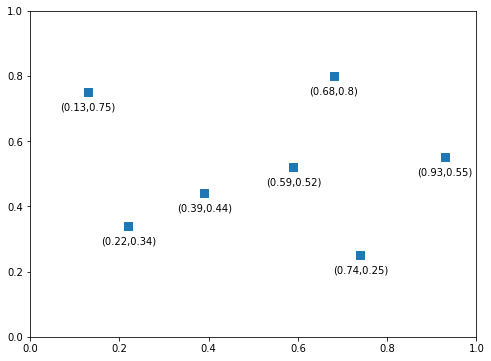

In [83]:
x_coords = [0.13, 0.22, 0.39, 0.59, 0.68, 0.74,0.93]
y_coords = [0.75, 0.34, 0.44, 0.52, 0.80, 0.25,0.55]

fig = plt.figure(figsize = (8,6))

plt.scatter(x_coords, y_coords, marker = 's', s = 50)
for x, y in zip(x_coords, y_coords):
    plt.annotate('(%s,%s)'%(x,y), xy=(x,y),xytext = (0, -10), textcoords = 'offset points',ha = 'center', va = 'top')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

/home/cby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


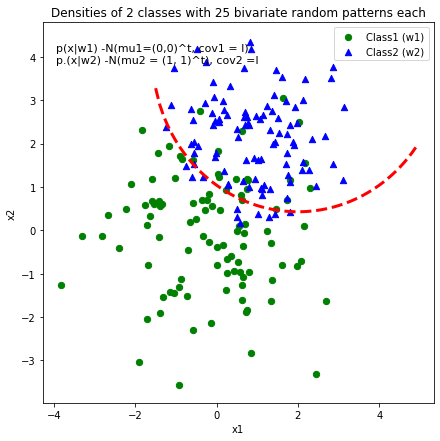

In [88]:
def decision_boundary(x_1):
    """Calculates the x_2 value for plotting the decision boundary."""
    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))

# Generating a gaussion dataset:
# creating random vectors from the multivariate normal distribution
# given mean and covariance

mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1,100)
mu_vec1 = mu_vec1.reshape(1,2).T # TO 1-COL VECTOR

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T # to 2-col vector

# Main scatter plot and plot annotation

f, ax = plt.subplots(figsize = (7, 7))
ax.scatter(x1_samples[:, 0], x1_samples[:,1], marker = 'o',color = 'green', s=40)
ax.scatter(x2_samples[:, 0], x2_samples[:,1], marker = '^',color = 'blue', s =40)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc = 'upper right')
plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x|w1) -N(mu1=(0,0)^t, cov1 = I)\np.(x|w2) -N(mu2 = (1, 1)^t), cov2 =I'
plt.figtext(.15,.8, ftext, fontsize = 11, ha ='left')

#Adding decision boundary to plot

x_1 = np.arange(-5, 5, 0.1)
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'r--', lw = 3)

x_vec = np.linspace(*ax.get_xlim())
x_1 = np.arange(0, 100, 0.05)

plt.show()

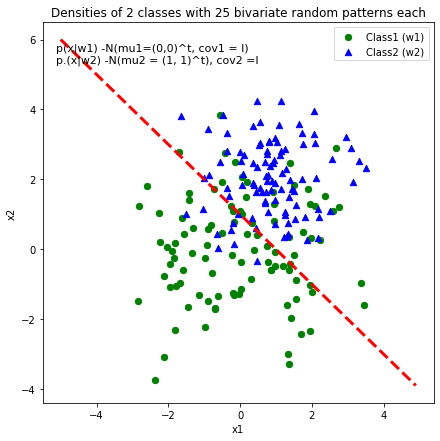

In [89]:
# 2-category classfication with random 2D-sample data
# from a multivariate normal distribution

import numpy as np
from matplotlib import pyplot as plt

def decision_boundary(x_1):
    """Calculates the x_2 value for plotting the decision boundary."""
#    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))
    return -x_1 + 1

# Generating a gaussion dataset:
# creating random vectors from the multivariate normal distribution
# given mean and covariance

mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1,100)
mu_vec1 = mu_vec1.reshape(1,2).T # TO 1-COL VECTOR

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T # to 2-col vector

# Main scatter plot and plot annotation

f, ax = plt.subplots(figsize = (7, 7))
ax.scatter(x1_samples[:, 0], x1_samples[:,1], marker = 'o',color = 'green', s=40)
ax.scatter(x2_samples[:, 0], x2_samples[:,1], marker = '^',color = 'blue', s =40)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc = 'upper right')
plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x|w1) -N(mu1=(0,0)^t, cov1 = I)\np.(x|w2) -N(mu2 = (1, 1)^t), cov2 =I'
plt.figtext(.15,.8, ftext, fontsize = 11, ha ='left')

#Adding decision boundary to plot

x_1 = np.arange(-5, 5, 0.1)
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'r--', lw = 3)

x_vec = np.linspace(*ax.get_xlim())
x_1 = np.arange(0, 100, 0.05)

plt.show()